# Finite difference method
This method is used to solve 2nd order differential equation(mainly boundary value problem) using discrete grid.
## Numerical differentiation
* First order derivative(Central difference):
$$f'(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h}$$
* Second order derivative:
$$f''(x_0) = \frac{f(x_0-h)-2f(x_0)+f(x_0+h)}{h^2}$$

# A general second order differential equation
$$\boxed{y''(x) + p(x)y'(x)+q(x)y(x) = r(x)}$$
Boundary conditions are   $y(x_0) = y_0 \hspace{2mm}y(x_{N-1})= y_{N-1}$. There is $N$ of grids. The above differential equation can be written as,
.

.

.

.

.

.

.

.

# Problem:
Given Legendre's equation: $(1 - x^2)y'' - 2xy' + 12y = 0$.
1. Solve the equation by *finite difference method* with the boundary conditions: $y(0.95) = -y(-0.95)=0.7184375$
2. Analytical solution of this ODE is $y(x) = \frac{1}{2}(5x^3 - 3x)$. Plot numerical solution slong with analytic solution.
3. Let, $\tilde{y}(x_i)$ be the numerical solution of the ODE on discrete $x_i$ points, and $y(x_i)$ be the analytic solution on those points. Define an error term $$e = \left(\frac{1}{N} \sum_{i = 0}^{N-1} (y(x_i) - \tilde{y}(x_i))^2\right)^{1/2}$$ study the variation of $e$ with the numbers of points $N$ considered in finite difference method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', "notebook", "grid"])

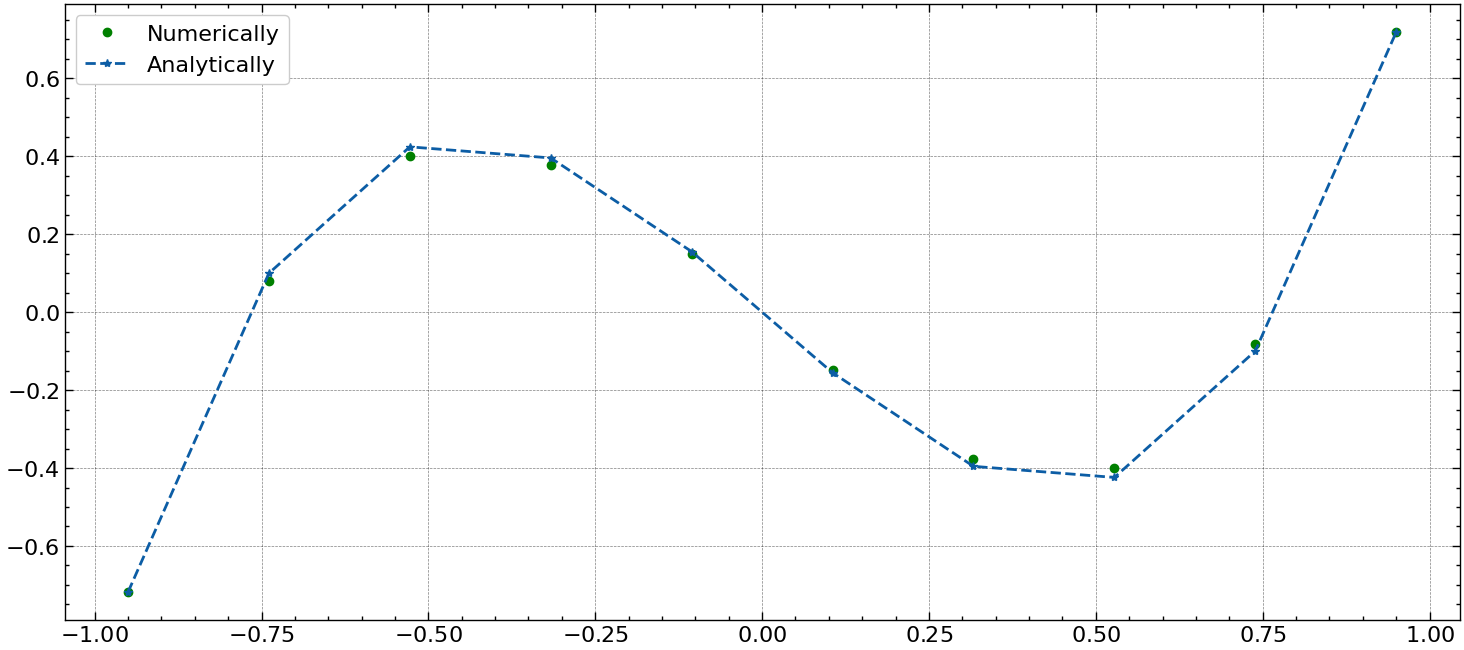

In [9]:
def Solution(N):
    x, h = np.linspace(-0.95, 0.95, N, retstep=True)

    # Null matrices
    A = np.zeros((N, N))
    b = np.zeros((N))

    # Tridiagonal matrix
    for i in range(1, N-1):
        A[i][i-1] = (1 - x[i]**2)/h**2 + x[i]/h
        A[i][i] = 12 - 2*(1 - x[i]**2)/h**2
        A[i][i+1] = (1 - x[i]**2)/h**2 - x[i]/h

    # Boundary values
    A[0][0], A[-1][-1] = 1, 1
    b[0], b[-1] = -0.7184375, 0.7184375

    # Solve the linear equations
    return np.linalg.solve(A, b)
N = 10
x, h = np.linspace(-0.95, 0.95, N, retstep=True)
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(x, Solution(N), "og", label = "Numerically")
plt.plot(x, 0.5*(5*x**3 - 3*x), "--*",label = "Analytically")
plt.legend()
plt.show()

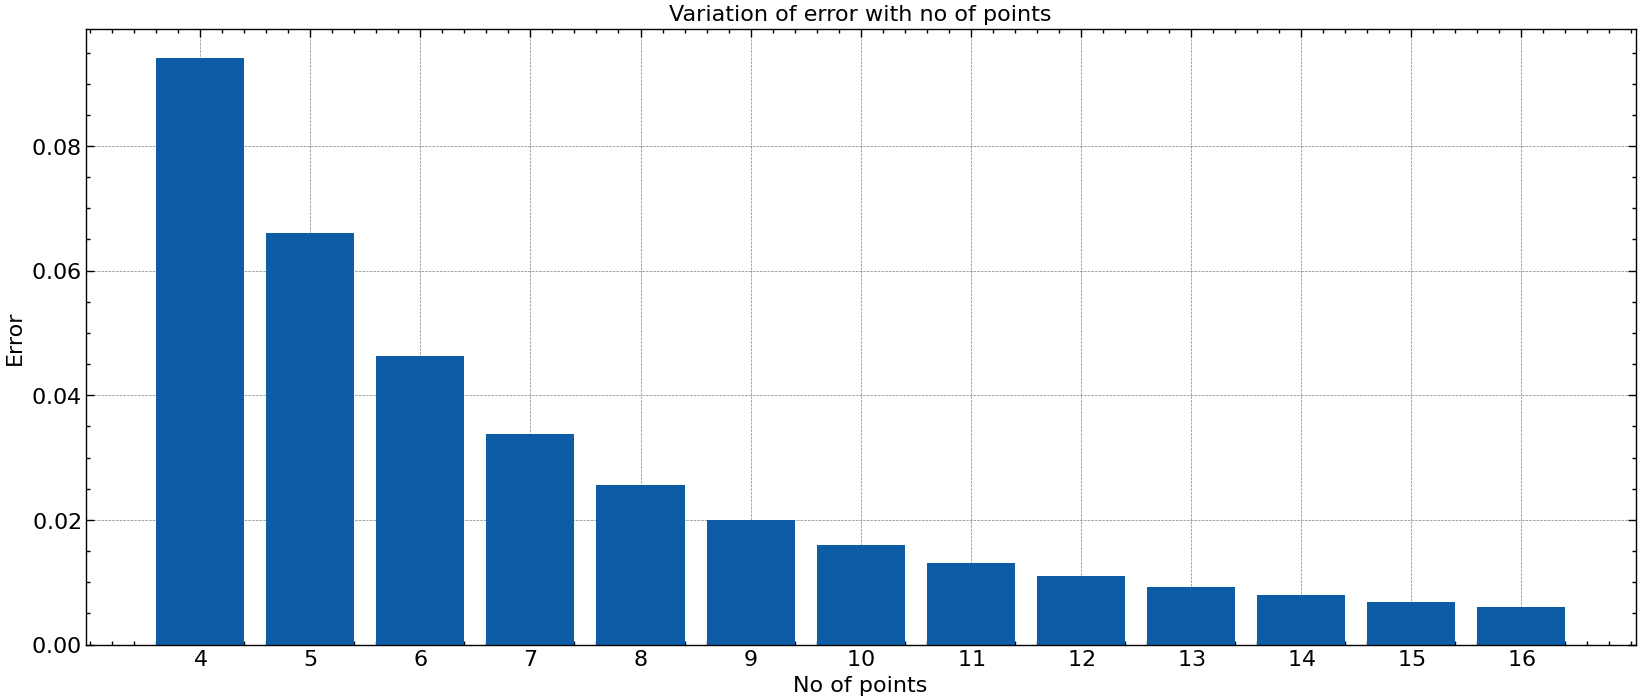

In [42]:
N = np.linspace(4, 16, 13)
E = []
for i in N:
    x = np.linspace(-0.95, 0.95, int(i))
    y = 0.5*(5*x**3 - 3*x)
    e = (sum((y - Solution(int(i)))**2)/int(i))**0.5
    E.append(e)

# Plotting
plt.figure(figsize=(20, 8))
plt.title("Variation of error with no of points")
plt.bar(N, E)
plt.xticks(N)
plt.xlabel("No of points")
plt.ylabel("Error")
plt.show()